# N-Gram

An n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words, or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.

In [1]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection.csv", sep="\t", names=["label", "message"])

In [2]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
# Data cleaning and preprocessing
import re
import nltk

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# nltk.download("stopwords") already done
stemmer = PorterStemmer()

In [6]:
# corpus = []
# for i in range(0, len(df)):
#     review = re.sub("[^a-zA-Z]", " ", df["message"][i]) # keep only letters
#     review = review.lower()
#     review = review.split()
#     review = [stemmer.stem(word) for word in review if word not in stopwords.words("english")]
#     review = " ".join(review)
#     corpus.append(review)

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [8]:
corpus = []
for i in range(0, len(df)):
    review = re.sub("[^a-zA-Z]", " ", df["message"][i]) # keep only letters
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [9]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [10]:
# create bag of words model with N-grams
from sklearn.feature_extraction.text import CountVectorizer

# For Binary Bag of Words enable binary=True or for Normal Bag of Words disable binary or set it to False
# For N-grams set ngram_range=(1, n) where n is the number of grams you want
vectorizer = CountVectorizer(
    max_features=500,
    binary=True,
    ngram_range=(1, 1) # To create unigrams (1-grams)
    # Change this to (1, 2) for Bi-grams, (1, 3) for Tri-grams and so on
)

In [11]:
X = vectorizer.fit_transform(corpus).toarray()

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
X.shape

(5572, 500)

In [14]:
vectorizer.vocabulary_

{'go': 157,
 'point': 323,
 'available': 25,
 'great': 165,
 'world': 483,
 'got': 163,
 'wat': 461,
 'ok': 293,
 'lar': 211,
 'wif': 472,
 'free': 144,
 'entry': 125,
 'win': 475,
 'final': 136,
 'st': 390,
 'may': 246,
 'text': 408,
 'receive': 343,
 'question': 335,
 'txt': 443,
 'rate': 337,
 'apply': 19,
 'dun': 114,
 'say': 358,
 'early': 116,
 'already': 10,
 'think': 415,
 'life': 224,
 'around': 21,
 'though': 418,
 'hey': 184,
 'week': 465,
 'word': 480,
 'back': 33,
 'like': 225,
 'fun': 149,
 'still': 395,
 'xxx': 490,
 'send': 365,
 'even': 127,
 'brother': 49,
 'speak': 388,
 'per': 307,
 'set': 368,
 'caller': 56,
 'friend': 145,
 'network': 277,
 'customer': 89,
 'selected': 364,
 'prize': 330,
 'claim': 71,
 'call': 54,
 'code': 75,
 'valid': 450,
 'hour': 191,
 'mobile': 261,
 'month': 264,
 'update': 446,
 'latest': 215,
 'colour': 78,
 'camera': 59,
 'co': 74,
 'gonna': 161,
 'home': 188,
 'soon': 385,
 'want': 459,
 'talk': 404,
 'stuff': 398,
 'tonight': 430,
 'en

In [15]:
bigrams_vectorizer = CountVectorizer(
    max_features=1500,
    binary=True,
    ngram_range=(1, 2)
)

In [16]:
X = bigrams_vectorizer.fit_transform(corpus).toarray()

In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
X.shape

(5572, 1500)

In [19]:
bigrams_vectorizer.vocabulary_

{'go': 484,
 'point': 972,
 'crazy': 261,
 'available': 64,
 'bugis': 127,
 'great': 509,
 'world': 1464,
 'la': 653,
 'cine': 195,
 'got': 505,
 'wat': 1405,
 'ok': 892,
 'lar': 660,
 'wif': 1436,
 'free': 435,
 'entry': 368,
 'wkly': 1453,
 'comp': 227,
 'win': 1439,
 'cup': 264,
 'final': 413,
 'st': 1193,
 'may': 764,
 'text': 1259,
 'receive': 1028,
 'question': 1006,
 'std': 1204,
 'txt': 1328,
 'rate': 1012,
 'apply': 47,
 'free entry': 438,
 'rate apply': 1013,
 'dun': 343,
 'say': 1084,
 'early': 348,
 'already': 29,
 'nah': 840,
 'think': 1272,
 'usf': 1371,
 'life': 693,
 'around': 52,
 'though': 1279,
 'freemsg': 442,
 'hey': 555,
 'darling': 277,
 'week': 1419,
 'word': 1460,
 'back': 78,
 'like': 696,
 'fun': 455,
 'still': 1205,
 'xxx': 1484,
 'send': 1105,
 'even': 374,
 'brother': 122,
 'speak': 1182,
 'treat': 1311,
 'per': 933,
 'request': 1048,
 'set': 1114,
 'caller': 152,
 'press': 986,
 'copy': 246,
 'friend': 447,
 'winner': 1443,
 'valued': 1379,
 'network': 85

In [20]:
bi_trigrams_vectorizer = CountVectorizer(
    max_features=1500,
    binary=True,
    ngram_range=(2, 3) # only bi-grams and tri-grams
)

In [21]:
X = bi_trigrams_vectorizer.fit_transform(corpus).toarray()

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
X.shape

(5572, 1500)

In [24]:
bi_trigrams_vectorizer.vocabulary_

{'free entry': 352,
 'entry wkly': 298,
 'wkly comp': 1457,
 'std txt': 1213,
 'txt rate': 1300,
 'rate apply': 1008,
 'free entry wkly': 354,
 'std txt rate': 1214,
 'txt rate apply': 1301,
 'per request': 903,
 'set callertune': 1128,
 'callertune caller': 147,
 'caller press': 143,
 'press copy': 973,
 'copy friend': 231,
 'friend callertune': 374,
 'set callertune caller': 1129,
 'callertune caller press': 148,
 'caller press copy': 144,
 'press copy friend': 974,
 'copy friend callertune': 232,
 'claim call': 178,
 'call claim': 106,
 'claim code': 179,
 'call claim code': 107,
 'entitled update': 294,
 'update latest': 1315,
 'latest colour': 663,
 'free call': 344,
 'call mobile': 124,
 'mobile update': 785,
 'update co': 1313,
 'co free': 189,
 'entitled update latest': 295,
 'update latest colour': 1316,
 'free call mobile': 345,
 'call mobile update': 125,
 'mobile update co': 786,
 'update co free': 1314,
 'chance win': 173,
 'win cash': 1440,
 'reply hl': 1035,
 'hl info': 

## How to Decide What N-Gram to Use?

### Step 1: Understand Your Task
- **Text Classification**: Start with unigrams (1-gram), add bigrams if needed
- **Language Modeling**: Use trigrams or higher (3-5 grams)
- **Sentiment Analysis**: Bigrams often capture negations ("not good")
- **Spam Detection**: Unigrams + bigrams work well
- **Machine Translation**: Higher n-grams (3-5) for context

### Step 2: Consider Text Length
- **Short texts** (tweets, SMS): Unigrams + bigrams (1-2 grams)
- **Medium texts** (reviews, articles): Up to trigrams (1-3 grams)
- **Long documents**: Can use higher n-grams (1-4 or 1-5 grams)

### Step 3: Evaluate Performance vs Complexity Trade-off

| N-Gram | Pros | Cons | Best For |
|--------|------|------|----------|
| **Unigrams (1)** | Simple, fast, less sparse | Loses word order, context | Basic classification |
| **Bigrams (2)** | Captures local context | More features, some sparsity | Sentiment, basic NLP |
| **Trigrams (3)** | Better context understanding | High dimensionality | Language modeling |
| **4+ grams** | Rich context | Very sparse, overfitting risk | Specialized tasks |


In [25]:
# Test different n-grams ranges and compare the performance
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

ngram_ranges = [(1,1), (1,2), (1,3), (2,2), (2,3)]
max_features_list = [500, 1000, 1500, 2000, 3000]

In [26]:
results = []
for ngram_range in ngram_ranges:
    print(f"N-gram range {ngram_range}:")
    print("-" * 40)
    for max_feat in max_features_list:
        vectorizer = CountVectorizer(
            max_features=max_feat,
            binary=True,
            ngram_range=ngram_range
        )
        
        X = vectorizer.fit_transform(corpus)
        
        actual_features = len(vectorizer.vocabulary_)
        
        classifier = MultinomialNB()
        scores = cross_val_score(classifier, X, df["label"], cv=5)
        
        result = {
            'ngram_range': ngram_range,
            'max_features': max_feat,
            'actual_features': actual_features,
            'cv_score': scores.mean(),
            'cv_std': scores.std()
        }
        results.append(result)
        
        print(f"  max_features={max_feat}: Score={scores.mean():.3f}±{scores.std():.3f}, Features={actual_features}")
    
    print()

results_df = pd.DataFrame(results)
print("=== SUMMARY TABLE ===")
print(results_df.to_string(index=False))

N-gram range (1, 1):
----------------------------------------
  max_features=500: Score=0.976±0.003, Features=500
  max_features=1000: Score=0.980±0.002, Features=1000
  max_features=1500: Score=0.981±0.001, Features=1500
  max_features=2000: Score=0.981±0.003, Features=2000
  max_features=3000: Score=0.982±0.002, Features=3000

N-gram range (1, 2):
----------------------------------------
  max_features=500: Score=0.976±0.004, Features=500
  max_features=1000: Score=0.980±0.004, Features=1000
  max_features=1500: Score=0.982±0.002, Features=1500
  max_features=2000: Score=0.982±0.002, Features=2000
  max_features=3000: Score=0.984±0.002, Features=3000

N-gram range (1, 3):
----------------------------------------
  max_features=500: Score=0.976±0.004, Features=500
  max_features=1000: Score=0.980±0.004, Features=1000
  max_features=1500: Score=0.982±0.002, Features=1500
  max_features=2000: Score=0.983±0.002, Features=2000
  max_features=3000: Score=0.983±0.001, Features=3000

N-gram 

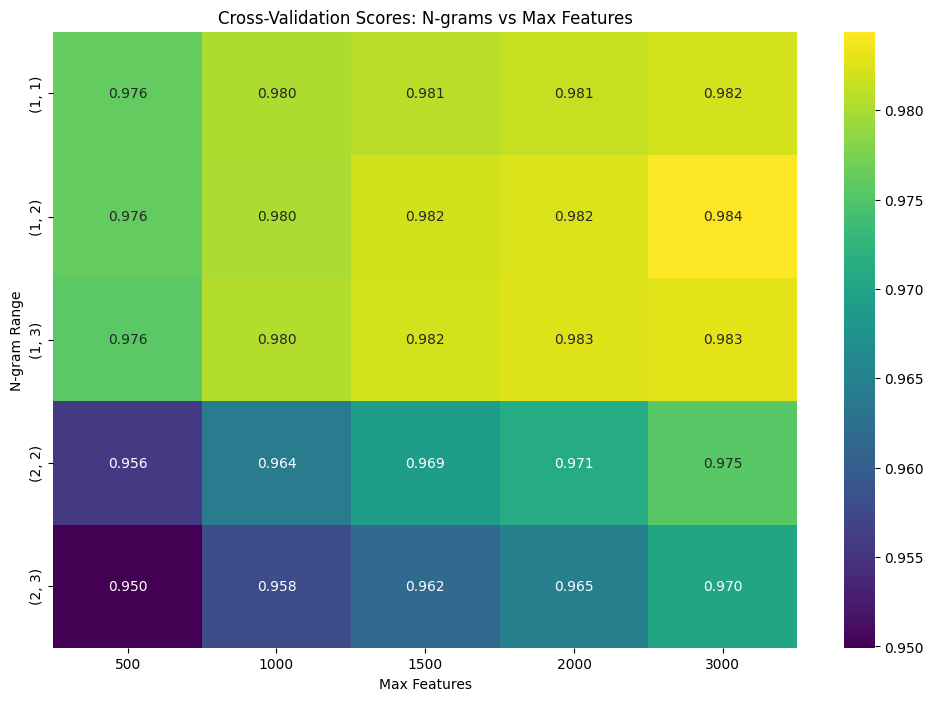


Best combination:
N-gram range: (1, 2)
Max features: 3000
Score: 0.984


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_scores = results_df.pivot(index='ngram_range', columns='max_features', values='cv_score')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_scores, annot=True, fmt='.3f', cmap='viridis')
plt.title('Cross-Validation Scores: N-grams vs Max Features')
plt.xlabel('Max Features')
plt.ylabel('N-gram Range')
plt.show()

# Find best combination
best_result = results_df.loc[results_df['cv_score'].idxmax()]
print(f"\nBest combination:")
print(f"N-gram range: {best_result['ngram_range']}")
print(f"Max features: {best_result['max_features']}")
print(f"Score: {best_result['cv_score']:.3f}")